# Logistic Regression scores LB 0.800
In this kernel, we present a simple logistic regression model for Kaggle's "Instant Gratification" competition. This kernel demonstrates that interactions between the variable `wheezy-copper-turtle-magic` and the other variables exist. And it demonstrates that a simple model can perform well. Without interactions LR (logistic regression) scores CV 0.530, and with interactions LR scores CV 0.805 and LB 0.808

# Load Data

In [1]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


# Logistic Regression without interactions
None of the 256 variables have correlation with the target greater than absolute value 0.04. Therefore if you use LR to model target you score a low CV 0.530 because LR treats the variables as independent and doesn't utilize interactions.

In [2]:
cols = [c for c in train.columns if c not in ['id', 'target']]
oof = np.zeros(len(train))
skf = StratifiedKFold(n_splits=5, random_state=42)
   
for train_index, test_index in skf.split(train.iloc[:,1:-1], train['target']):
    clf = LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
    clf.fit(train.loc[train_index][cols],train.loc[train_index]['target'])
    oof[test_index] = clf.predict_proba(train.loc[test_index][cols])[:,1]
    
auc = roc_auc_score(train['target'],oof)
print('LR without interactions scores CV =',round(auc,5))

LR without interactions scores CV = 0.52994


# Logistic Regression with interactions
Using LR, we can build a model that includes interactions by building 512 separate models. We will build one LR (logistic regression) model for each value of `wheezy-copper-turtle-magic` and use the appropriate model to predict `test.csv`. This scores CV 0.805 and LB 0.808

In [3]:
# INITIALIZE VARIABLES
cols.remove('wheezy-copper-turtle-magic')
interactions = np.zeros((512,255))
oof = np.zeros(len(train))
preds = np.zeros(len(test))

# BUILD 512 SEPARATE MODELS
for i in range(512):
    # ONLY TRAIN WITH DATA WHERE WHEEZY EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)
    test2.reset_index(drop=True,inplace=True)
    
    skf = StratifiedKFold(n_splits=25, random_state=42)
    for train_index, test_index in skf.split(train2.iloc[:,1:-1], train2['target']):
        # LOGISTIC REGRESSION MODEL
        clf = LogisticRegression(solver='liblinear',penalty='l1',C=0.05)
        clf.fit(train2.loc[train_index][cols],train2.loc[train_index]['target'])
        oof[idx1[test_index]] = clf.predict_proba(train2.loc[test_index][cols])[:,1]
        preds[idx2] += clf.predict_proba(test2[cols])[:,1] / 25.0
        # RECORD INTERACTIONS
        for j in range(255):
            if clf.coef_[0][j]>0: interactions[i,j] = 1
            elif clf.coef_[0][j]<0: interactions[i,j] = -1
    #if i%25==0: print(i)
        
# PRINT CV AUC
auc = roc_auc_score(train['target'],oof)
print('LR with interactions scores CV =',round(auc,5))

LR with interactions scores CV = 0.80549


# Submit Predictions

In [4]:
sub = pd.read_csv('../input/sample_submission.csv')
sub['target'] = preds
sub.to_csv('submission.csv',index=False)

Our submission scores LB 0.808, hooray. This is a good score and it matches our CV 0.805

# Conclusion
In conclusion we see that the variable `wheezy-copper-turtle-magic` interacts with other variables to predict target. Also we see that a simple model can score a high CV and LB score.

This is similar to the classic XOR problem. Suppose we have data with two variables and one target: `(x1,x2,y)` with the following 4 rows: `(0,0,0), (1,0,1), (0,1,1), (1,1,0)`. Notice that neither `x1` nor `x2` correlate with target `y`. Also `x1` and `x2` do not correlate with each other. However, `x1` and `x2` interact. Whenever `x1` is not equal to `x2` then `y=1` and when `x1=x2` then `y=0`. So together they predict `y` but separately they cannot predict `y`.

# Interactions
Below shows the interactions between `wheezy-copper-turtle-magic` and the other variables. Each variable by itself cannot predict target well, but when `wheezy-copper-turtle-magic` equals a specific value then other variables can predict target well. For example, when `wheezy-copper-turtle-magic = 0` then `zippy-harlequin-otter-grandmaster` is positively correlated with target. And when `wheezy-copper-turtle-magic = 0` then `hasty-puce-fowl-fepid` is negatively correlated with target.

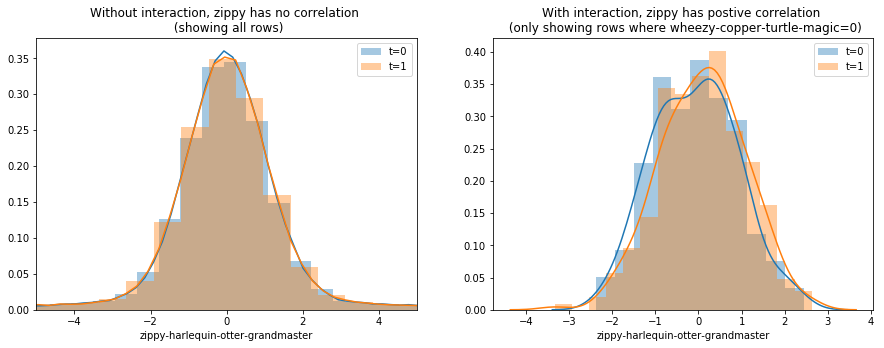

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,5))

# PLOT ALL ZIPPY
plt.subplot(1,2,1)
sns.distplot(train[ (train['target']==0) ]['zippy-harlequin-otter-grandmaster'], label = 't=0')
sns.distplot(train[ (train['target']==1) ]['zippy-harlequin-otter-grandmaster'], label = 't=1')
plt.title("Without interaction, zippy has no correlation \n (showing all rows)")
plt.xlim((-5,5))
plt.legend()

# PLOT ZIPPY WHERE WHEEZY-MAGIC=0
plt.subplot(1,2,2)
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==0) ]
             ['zippy-harlequin-otter-grandmaster'], label = 't=0')
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==1) ]
             ['zippy-harlequin-otter-grandmaster'], label = 't=1')
plt.title("With interaction, zippy has postive correlation \n (only showing rows where wheezy-copper-turtle-magic=0)")
plt.legend()

plt.show()

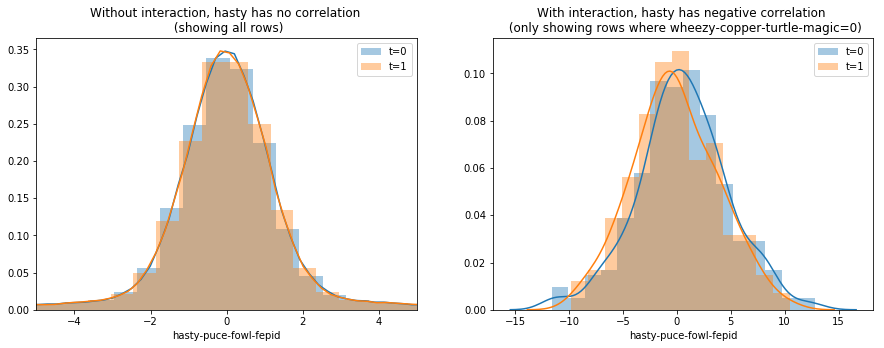

In [6]:
plt.figure(figsize=(15,5))

# PLOT ALL HASTY
plt.subplot(1,2,1)
sns.distplot(train[ (train['target']==0) ]['hasty-puce-fowl-fepid'], label = 't=0')
sns.distplot(train[ (train['target']==1) ]['hasty-puce-fowl-fepid'], label = 't=1')
plt.title("Without interaction, hasty has no correlation \n (showing all rows)")
plt.xlim((-5,5))
plt.legend()

# PLOT HASTY WHERE WHEEZY-MAGIC=0
plt.subplot(1,2,2)
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==0) ]
             ['hasty-puce-fowl-fepid'], label = 't=0')
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==1) ]
             ['hasty-puce-fowl-fepid'], label = 't=1')
plt.title("With interaction, hasty has negative correlation \n (only showing rows where wheezy-copper-turtle-magic=0)")
plt.legend()

plt.show()

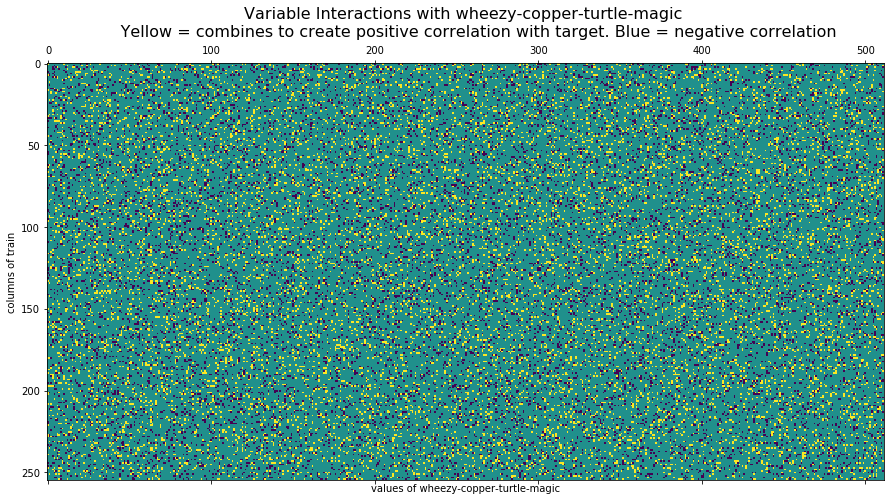

In [7]:
# PLOT INTERACTIONS WITH WHEEZY-MAGIC
plt.figure(figsize=(15,8))
plt.matshow(interactions.transpose(),fignum=1)
plt.title("Variable Interactions with wheezy-copper-turtle-magic \n \
    Yellow = combines to create positive correlation with target. Blue = negative correlation",fontsize=16)
plt.xlabel('values of wheezy-copper-turtle-magic')
plt.ylabel('columns of train')
plt.show()